# Chapter 3 Factor investing and asset pricing anomalies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset

In [4]:
def load_dataset(
    start_date: str = '1999-12-31',
    end_date: str = '2019-01-01') -> np.ndarray:
    '''
    Parameters
    ----------
    start_date: str, start date of the stock dataset, default = '1999-12-31'
    end_date: str, end date of the stock dataset, default = '2019-01-01'
    
    Returns
    -------
    np.ndarray
    '''
    data_raw = pd.read_csv('data_ml.csv', index_col=0)
    data_raw.reset_index(inplace=True)
    del data_raw['index']

    idx_date = data_raw.index[(data_raw['date'] > start_date) & (data_raw['date'] < end_date)].to_list()
    data_ml = data_raw.iloc[idx_date]
    
    return data_ml

In [5]:
data_ml = load_dataset()

In [6]:
data_ml.head()

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.089,0.104,0.344,-0.041
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113


In [7]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268336 entries, 0 to 283379
Data columns (total 99 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   stock_id                        268336 non-null  int64  
 1   date                            268336 non-null  object 
 2   Advt_12M_Usd                    268336 non-null  float64
 3   Advt_3M_Usd                     268336 non-null  float64
 4   Advt_6M_Usd                     268336 non-null  float64
 5   Asset_Turnover                  268336 non-null  float64
 6   Bb_Yld                          268336 non-null  float64
 7   Bv                              268336 non-null  float64
 8   Capex_Ps_Cf                     268336 non-null  float64
 9   Capex_Sales                     268336 non-null  float64
 10  Cash_Div_Cf                     268336 non-null  float64
 11  Cash_Per_Share                  268336 non-null  float64
 12  Cf_Sales             

## Compute equally weighted portfolios (above and below the median)

In [9]:
def compute_equally_weighted_ptf(
    df: np.ndarray,
    sorting_feature: str = 'Mkt_Cap_12M_Usd',
    return_feature: str = 'R1M_Usd',
    is_visualise: bool = False) -> np.ndarray:
    '''
    Parameters
    ----------
    df: dataset, 
    sorting_feature: str, optional, default is Mkt_Cap_12M_Usd
    return_feature: str, optional, default is R1M_Usd
    is_visualise: bool
    
    Returns
    -------
    np.ndarray
    '''
    assert 'date' in df.columns
    assert sorting_feature in df.columns
    assert return_feature in df.columns
    
    df_median = df[['date', sorting_feature]].groupby(['date']).median().reset_index()
    df_median.rename(columns = {sorting_feature: sorting_feature + '_median'}, inplace = True)

    df = pd.merge(data_ml[['date', sorting_feature, return_feature]],
                  df_median,
                  how = 'left',
                  on = ['date'])
    df = df.groupby(
        [pd.to_datetime(df['date']).dt.year,
         np.where(df[sorting_feature] > df[sorting_feature + '_median'], 'above-median', 'below-median')])[return_feature].mean().reset_index()
    df.rename(columns = {'level_1': sorting_feature + '_sort'}, inplace = True)

    df = df.pivot(index='date', columns = sorting_feature + '_sort', values = return_feature)

    if is_visualise == True:
        df.plot.bar(figsize=(10, 6))
        plt.ylabel('Average ' + return_feature)
        plt.xlabel('date')
        plt.title('Equally weighted portfolios by sorting ' + sorting_feature)
        
    return df

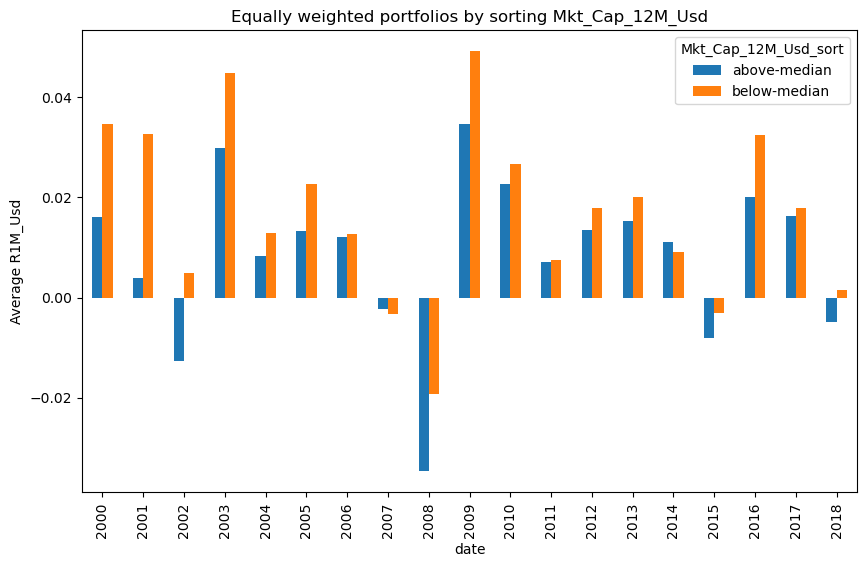

In [10]:
ptf_1 = compute_equally_weighted_ptf(data_ml, is_visualise = True)

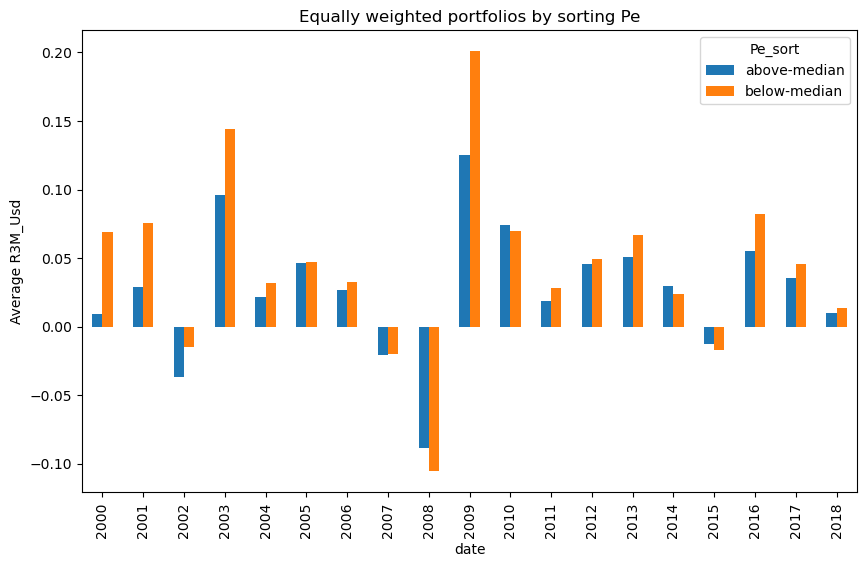

In [11]:
ptf_2 = compute_equally_weighted_ptf(data_ml, 'Pe', 'R3M_Usd', is_visualise = True)

Questions:
1. Can we further generalize the function into multiple factors?
2. Can we futher generalize the function such that the portfolio is not necessarily equally weighted?